<a href="https://colab.research.google.com/github/akrambchiri123/deep-learning-coursera/blob/master/handwritten_with_logistic_regression_bytorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn 
import torchvision
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
from torch.autograd import Variable 
import numpy as np
import matplotlib.pyplot as plt
import torchsampler


In [ ]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST Dataset (Images and Labels) 
train_dataset = dsets.MNIST(root ='./data',  
                            train = True,  
                            transform = transforms.ToTensor(), 
                            download = True) 
  
test_dataset = dsets.MNIST(root ='./data',  
                           train = False,  
                           transform = transforms.ToTensor()) 
  



See the labels for each image

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

see how many of each label exists in the dataset

In [ ]:
train_dataset.targets.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

=====> imbalanced dataset


=====> balanced dataset


to get an item (image,labels) thats why len(sample)=2

In [ ]:
sample = next(iter(train_dataset))
len(sample)
print(sample[1])

5


In [ ]:
print(type(image))
image.shape

<class 'torch.Tensor'>


torch.Size([100, 1, 28, 28])

In [ ]:
print(type(label))
torch.tensor(label).shape


<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


torch.Size([100])

to remove the 1


In [ ]:
image.squeeze().shape

torch.Size([100, 28, 28])

Let’s plot the image now, and we’ll see why we squeezed the tensor in the first place. We first squeeze the tensor and then pass it to the imshow() function.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor(1)

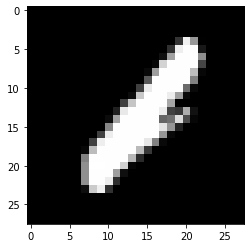

In [ ]:
plt.imshow(image[0].squeeze().reshape(28,28), cmap="gray")
torch.tensor(label[0])

we have 100 images with a shape of (1,28,28) because we have fixed the batch size =100


Now we will creat data loader with a smaller batch size of 100

example of getting a sample of loader data

tensor(5)


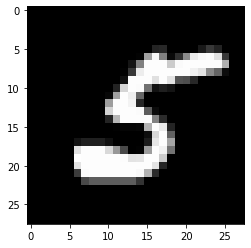

In [ ]:
sampleloder=next(iter(train_loader))
len(sampleloder)
sampleloder[0][0].shape
plt.imshow(sampleloder[0][0].squeeze(), cmap="gray")
print(sampleloder[1][0])

In [ ]:
batch = next(iter(train_loader))
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([100, 1, 28, 28]) torch.Size([100])


To plot a batch of images, we can use the torchvision.utils.make_grid() function to create a grid that can be plotted like so:

labels: tensor([6, 2, 9, 9, 3, 8, 4, 8, 6, 7])


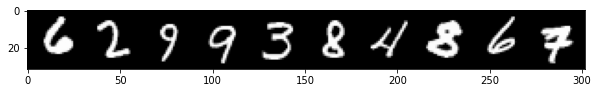

In [ ]:
grid = torchvision.utils.make_grid(images[:10], nrow=10)

plt.figure(figsize=(10,10))
plt.imshow(np.transpose(grid, (1,2,0)))
# the permute() PyTorch tensor method can be used in place of np.transpose()
print('labels:', labels[:10])


another way to plot the images using the PyTorch DataLoader

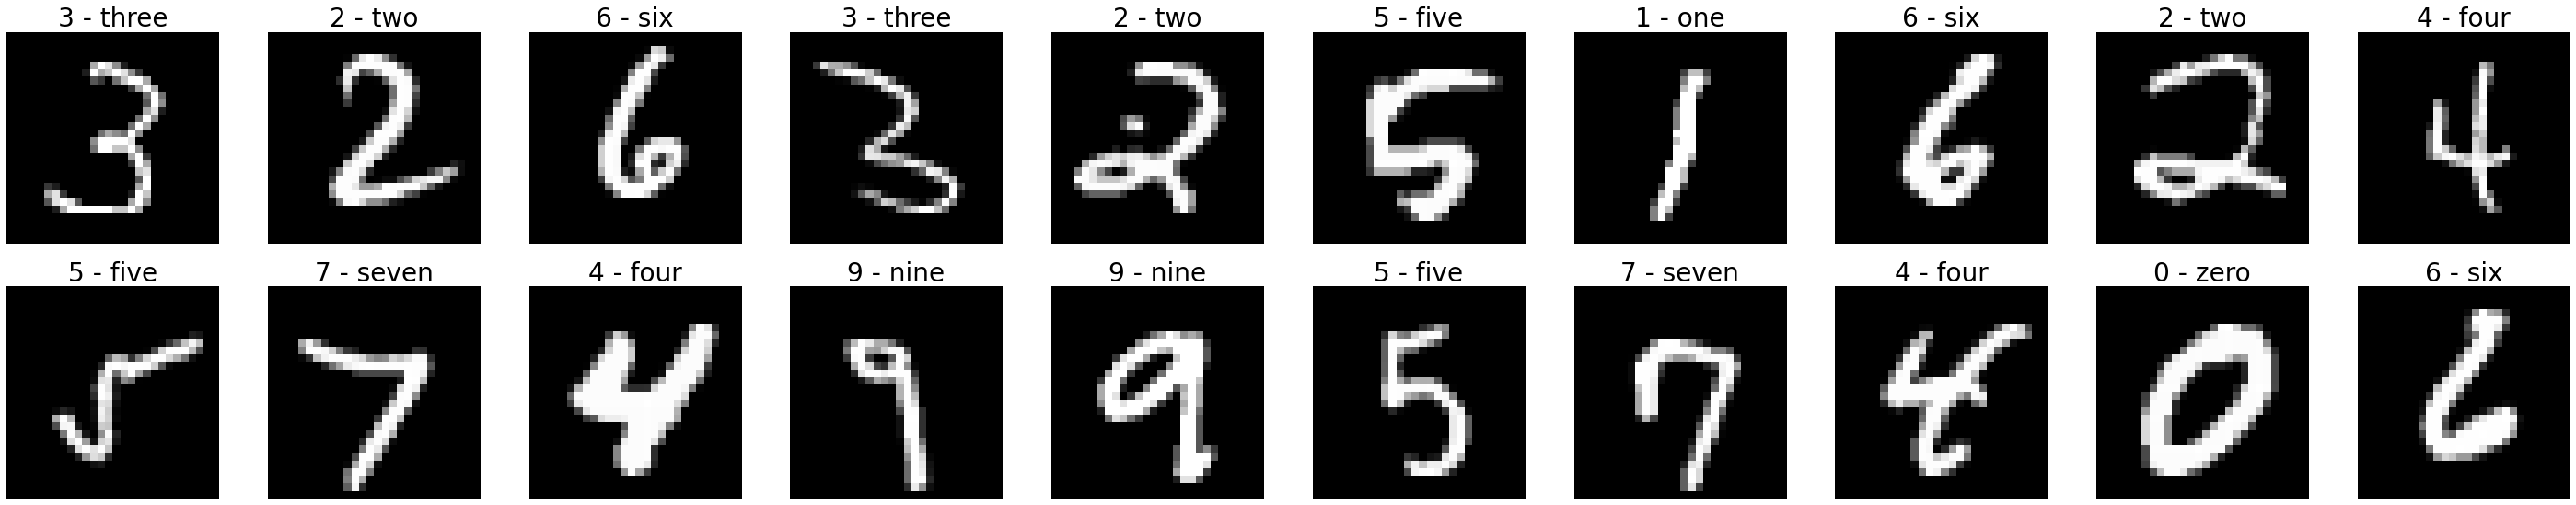

In [ ]:
how_many_to_plot = 20

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_dataset.classes[label[i]], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

BUILDING OF THE MODELE


In [ ]:
class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
  
    def forward(self, x): 
        out = self.linear(x) 
        return out 

In [ ]:
model = LogisticRegression(input_size, num_classes) 

In [ ]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 


In [ ]:
# Training the Model 
for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = Variable(images.view(-1, 28 * 28)) 
        labels = Variable(labels) 
  
        # Forward + Backward + Optimize 
        optimizer.zero_grad() 
        outputs = model(images) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        

TESTING our model

In [ ]:
# Test the Model 
import matplotlib.pyplot as plt
correct = 0
total = 0
for images, labels in test_loader: 
    images = Variable(images.view(-1, 28 * 28)) 
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
  
print('Accuracy of the model on the 10000 test images: % d %%' % ( 
            100 * correct / total))

Accuracy of the model on the 10000 test images:  82 %


example te3 sample numero 50 men test_loder

tensor([6])


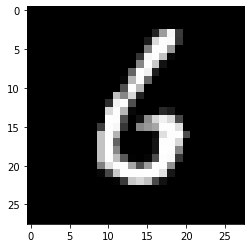

In [ ]:
samplelodertest=next(iter(test_loader))

img = Variable(samplelodertest[0][50].view(-1, 28 * 28)) 
outp=model(img)
_,pre=torch.max(outp.data, 1)
plt.imshow(samplelodertest[0][50].squeeze(), cmap="gray")
print(pre)

example te3 20 samples

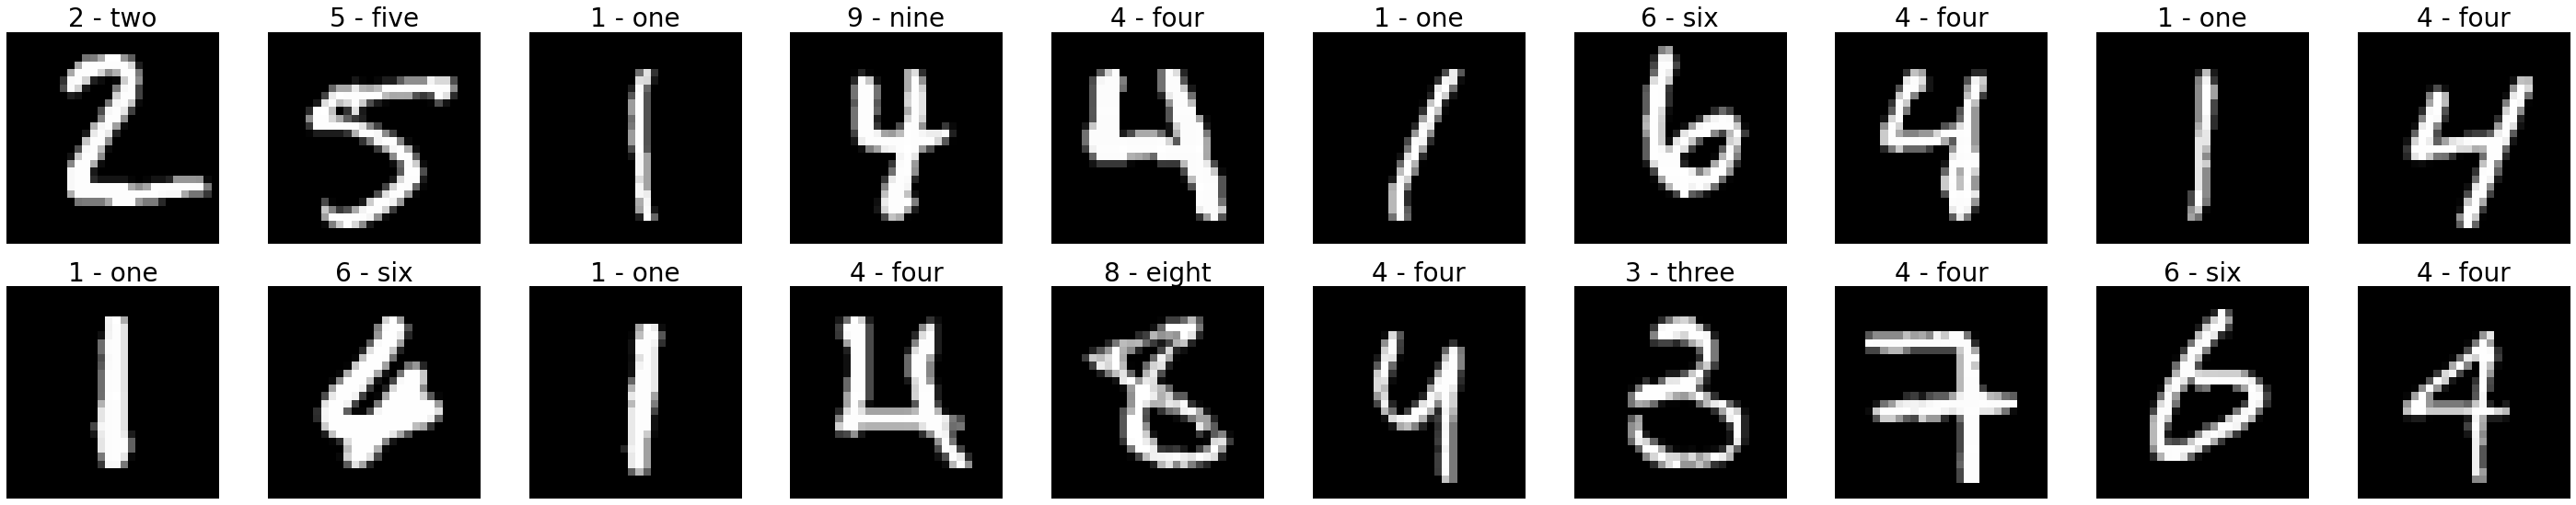

In [ ]:
how_many_to_plot = 20

plt.figure(figsize=(50,50))
for i, batch in enumerate(test_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    imgi = Variable(image[i].view(-1, 28 * 28)) 
    outpi=model(imgi)
    _,predictioni=torch.max(outpi.data, 1)
    plt.title(test_dataset.classes[predictioni], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

FINALLYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY :p

on peut ameliorer our accuracy with CNN